In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.examples. tutorials.mnist import input_data
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils as np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import Callback

In [9]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
x_train = X_train.reshape(-1, 28, 28, 1)/255
x_test = X_test.reshape(-1, 28, 28, 1)/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
x_val = x_train[:5000]
x_train = x_train[5000:]
y_val = y_train[:5000]
y_train = y_train[5000:]

In [147]:
model = Sequential()  
model.add(Conv2D(filters=32,  kernel_size=(3,3),  padding='same',  input_shape=(28,28,1),  activation='relu'))   
model.add(MaxPooling2D(pool_size=(2,2)))      
model.add(Flatten()) 
model.add(Dense(10, activation='softmax'))  

In [148]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


In [149]:
class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.loss = []
        self.acc = []

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        self.loss.append(loss)
        self.acc.append(acc)
    def get_history(self):
        return (self.loss, self.acc)
mycallback = TestCallback([x_test, y_test])        
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(x_train, y_train, epochs=10, batch_size=64, shuffle=True, validation_data=(x_val, y_val), callbacks=mycallback)
print(model.evaluate(x_test, y_test))

Epoch 1/10
860/860 [==============================] - 9s 10ms/step - loss: 0.2896 - accuracy: 0.9195 - val_loss: 0.1343 - val_accuracy: 0.9648
Epoch 2/10
860/860 [==============================] - 9s 10ms/step - loss: 0.1037 - accuracy: 0.9711 - val_loss: 0.0854 - val_accuracy: 0.9752
Epoch 3/10
860/860 [==============================] - 9s 10ms/step - loss: 0.0735 - accuracy: 0.9794 - val_loss: 0.0734 - val_accuracy: 0.9784
Epoch 4/10
860/860 [==============================] - 9s 10ms/step - loss: 0.0601 - accuracy: 0.9820 - val_loss: 0.0686 - val_accuracy: 0.9808
Epoch 5/10
860/860 [==============================] - 9s 10ms/step - loss: 0.0516 - accuracy: 0.9847 - val_loss: 0.0614 - val_accuracy: 0.9834
Epoch 6/10
860/860 [==============================] - 9s 10ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0702 - val_accuracy: 0.9786
Epoch 7/10
860/860 [==============================] - 9s 10ms/step - loss: 0.0406 - accuracy: 0.9880 - val_loss: 0.0634 - val_accuracy: 0.9824

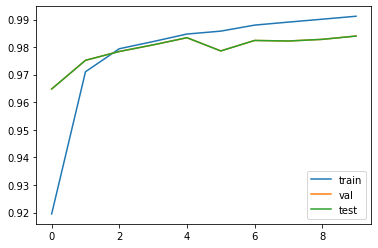

In [150]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
test_loss, test_acc = mycallback.get_history()
t = range(len(train_loss))
plt.plot(t, train_acc, label='train')
plt.plot(t, val_acc, label='val')
plt.plot(t, test_acc, label='test')
plt.legend()
plt.show()

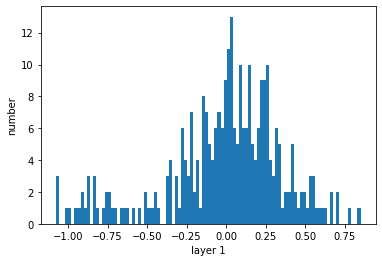

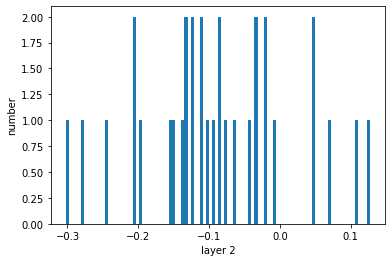

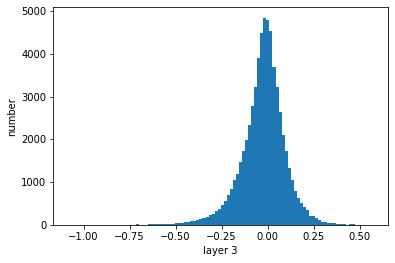

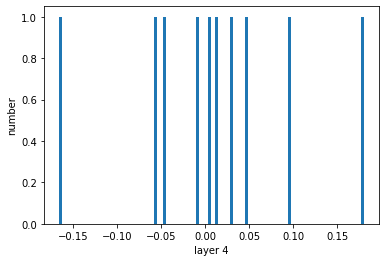

In [155]:
weights = model.get_weights()
for idx, fc in enumerate(weights):
    plt.figure()
    plt.hist(fc.flatten(), 100)
    plt.xlabel('layer ' + str(idx + 1))
    plt.ylabel('number')
plt.show()

In [138]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                31370     
Total params: 31,530
Trainable params: 31,530
Non-trainable params: 0
_________________________________________________________________
